I. Import dataset và thư viện cần thiết

Link dataset:  https://www.kaggle.com/code/soheiltehranipour/customer-chrun-imbalanced-data/input

In [1]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
pip install tensorflow keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [6]:
pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install nbformat --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
%matplotlib inline

import pandas as pd
import numpy as np

#preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

#chia du lieu train test
from sklearn.model_selection import train_test_split

#PipeLine
from sklearn.pipeline import Pipeline

#xu ly null value
from sklearn.impute import SimpleImputer

#SVM: Gồm SVC và SVR (2 bai toan classification và regression)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Desision Tree
from sklearn.tree import DecisionTreeClassifier

#chuan hoa dang so 
from sklearn.preprocessing import StandardScaler, Normalizer

#thu vien report data
from ydata_profiling import ProfileReport

from sklearn.compose import ColumnTransformer
#model danh gia cho classification
from sklearn.metrics import classification_report

#Cach Chon nhanh sieu tham so cho mo hinh de toi uu 
from sklearn.model_selection import GridSearchCV

#Kiem tra overfitting
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

#thu vien visualize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import cufflinks as cf

#
from sklearn.metrics import accuracy_score, f1_score

#UnderSampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

#OverSampling
from imblearn.over_sampling import RandomOverSampler

#SMOTE
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input




II. Load and understand dataset

In [9]:
# Load dataset
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
#libary for statistic and visualize data
profile = ProfileReport(data, title="Churn Customer Report", explorative=True)
profile.to_file("Churn_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\ngkho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ydata_profiling\model\correlations.py:66: UserWarning:

There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'No'')



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
for col in data.columns.tolist():
    print("unique values of ",col)
    print(data[col].unique())
    print("-----------------",end='\n')

unique values of  customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
-----------------
unique values of  gender
['Female' 'Male']
-----------------
unique values of  SeniorCitizen
[0 1]
-----------------
unique values of  Partner
['Yes' 'No']
-----------------
unique values of  Dependents
['No' 'Yes']
-----------------
unique values of  tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
-----------------
unique values of  PhoneService
['No' 'Yes']
-----------------
unique values of  MultipleLines
['No phone service' 'No' 'Yes']
-----------------
unique values of  InternetService
['DSL' 'Fiber optic' 'No']
-----------------
unique values of  OnlineSecurity
['No' 'Yes' 'No internet service']
-----------------
unique values of  OnlineBackup
['Yes' 'No' 'No internet se

Churn
No     5174
Yes    1869
Name: count, dtype: int64


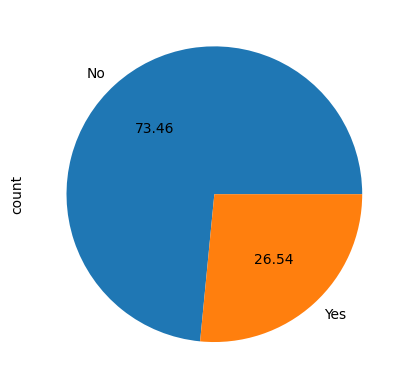

In [15]:
#Proved that data imbalanced
churn = data['Churn']
print(churn.value_counts())

churn = churn.value_counts().plot.pie(autopct = '%.2f')

III. Exploratory Data Analysis (EDA) on dataset:

- EDA on gender - churn

C:\Users\ngkho\AppData\Local\Temp\ipykernel_11260\1423146777.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<Axes: xlabel='gender', ylabel='Churn'>

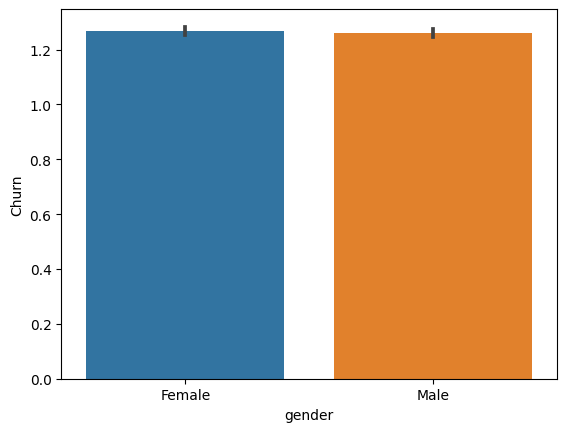

In [16]:
data_eda = pd.read_csv('Telco-Customer-Churn.csv')
data_eda.drop("customerID",axis=1,inplace=True)

columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in columns:
  data_eda[col] = data_eda[col].replace({'Yes': 2, 'No': 1})
  
data['gender'].value_counts()
sns.barplot(x = data_eda['gender'] ,y=data_eda['Churn'])

- EDA on Senior Citizen

<Axes: xlabel='SeniorCitizen', ylabel='Churn'>

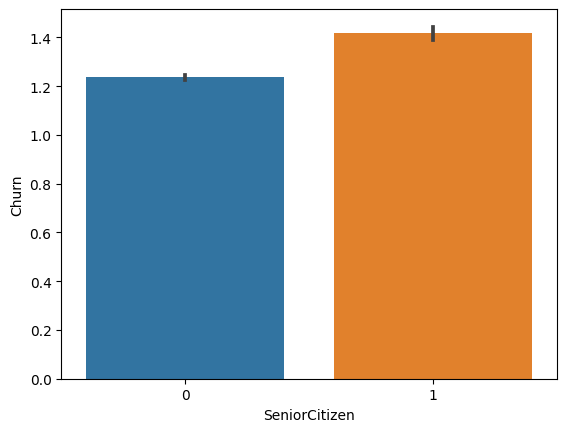

In [17]:
sns.barplot(x=data_eda['SeniorCitizen'], y=data_eda['Churn'])

- EDA on Partner 

<Axes: xlabel='Partner', ylabel='Churn'>

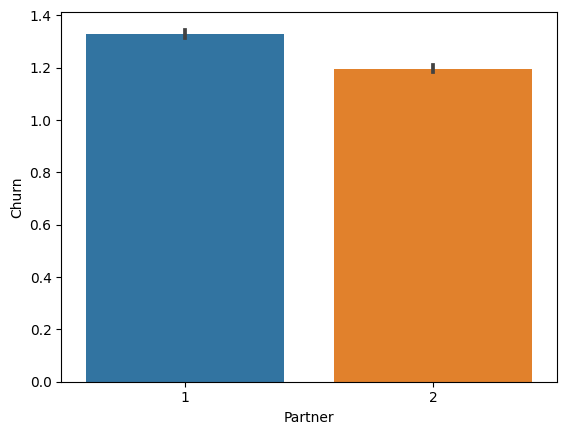

In [18]:
sns.barplot(x=data_eda['Partner'], y=data_eda['Churn']) # type: ignore

- EDA on Tenure

C:\Users\ngkho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ngkho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



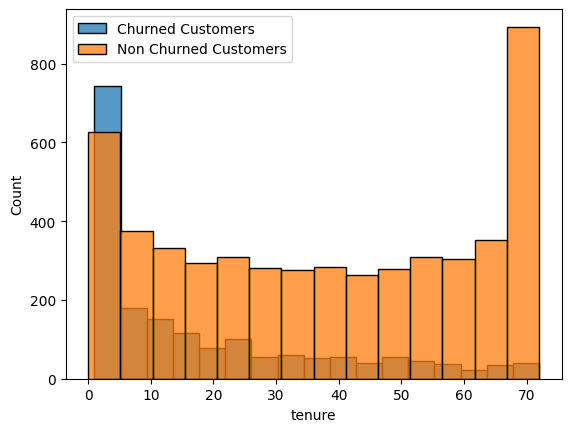

In [19]:
sns.histplot(data_eda[data_eda['Churn'] == 2]['tenure'], label='Churned Customers') # type: ignore
sns.histplot(data_eda[data_eda['Churn'] == 1]['tenure'], label='Non Churned Customers') # type: ignore
plt.legend()
plt.show()

- EDA on Contract

<Axes: xlabel='Contract', ylabel='Churn'>

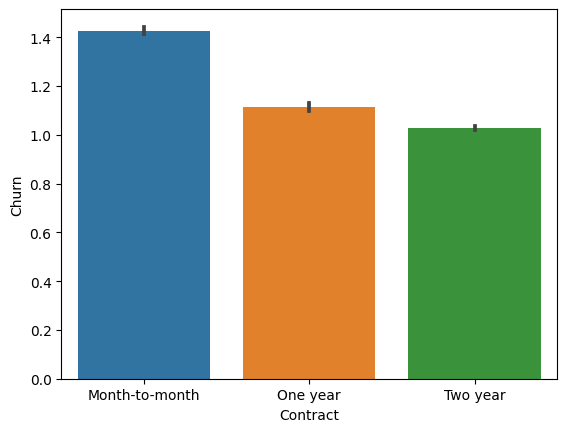

In [20]:
sns.barplot(x=data_eda['Contract'], y=data_eda['Churn'])

- EDA on Payment Method

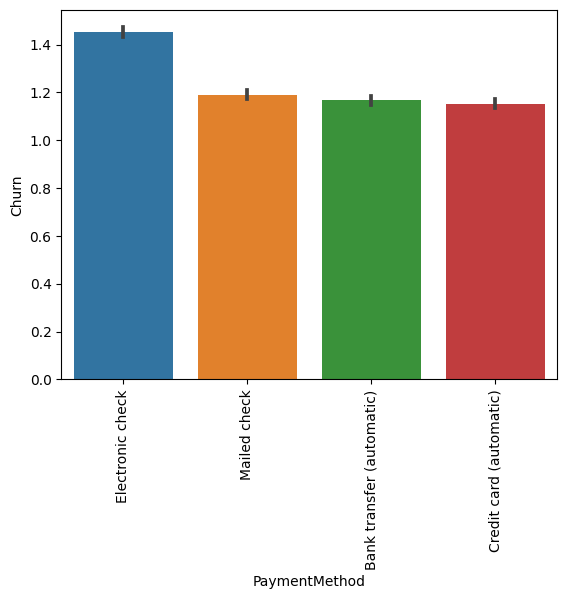

In [21]:
sns.barplot(x=data_eda['PaymentMethod'], y=data_eda['Churn'])
plt.xticks(rotation=90)
plt.show()

- EDA on MonthlyCharges

C:\Users\ngkho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



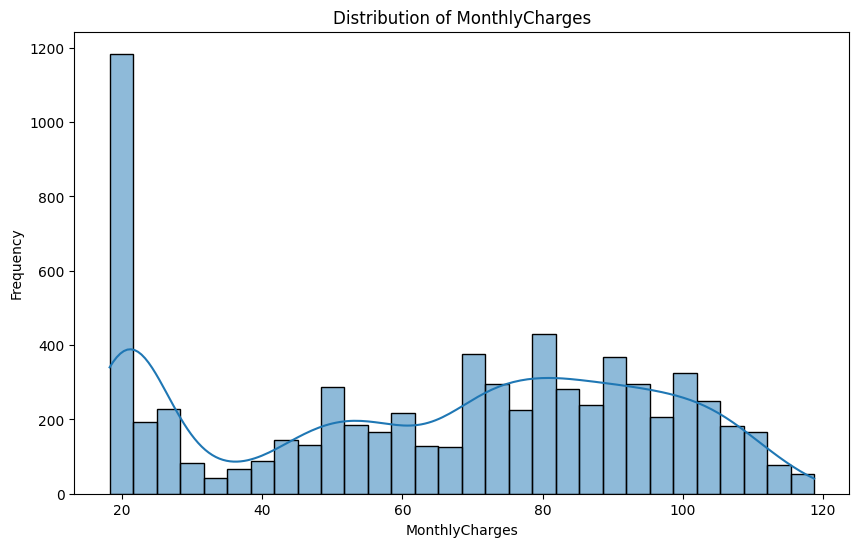

In [22]:
# Histogram of MonthlyCharges
plt.figure(figsize=(10, 6))
sns.histplot(data_eda['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.show()


C:\Users\ngkho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ngkho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



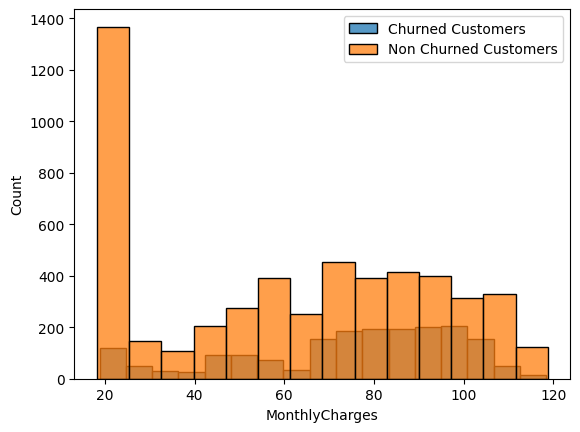

In [23]:
sns.histplot(data_eda[data_eda['Churn'] == 2]['MonthlyCharges'], label='Churned Customers')
sns.histplot(data_eda[data_eda['Churn'] == 1]['MonthlyCharges'], label='Non Churned Customers')
plt.legend()
plt.show()

- EDA on Total Charges

In [24]:
data_eda['TotalCharges'] = data_eda['TotalCharges'].replace(' ', np.nan).astype('float64')

C:\Users\ngkho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ngkho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



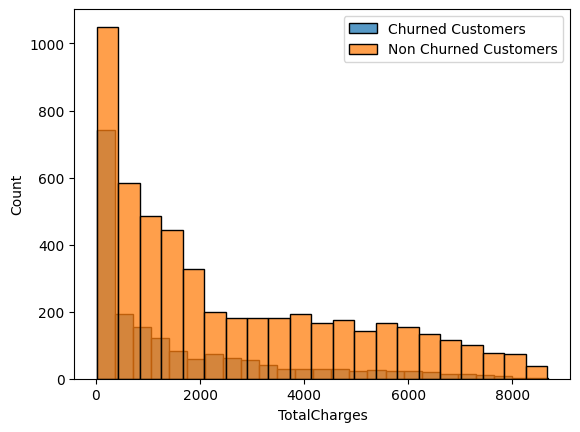

In [25]:
sns.histplot(data_eda[data_eda['Churn'] == 2]['TotalCharges'], label='Churned Customers')
sns.histplot(data_eda[data_eda['Churn'] == 1]['TotalCharges'], label='Non Churned Customers')
plt.legend()
plt.show()

- EDA on Extra Services

In [26]:
columns = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity']

for col in columns:
  data_eda[col] = data_eda[col].replace('No internet service', 0)
  data_eda[col] = data_eda[col].astype('int64')
  
data_eda['MultipleLines'] = data_eda['MultipleLines'].replace('No phone service', 0)
data_eda['MultipleLines'] = data_eda['MultipleLines'].astype('int64')

C:\Users\ngkho\AppData\Local\Temp\ipykernel_11260\1487541588.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\ngkho\AppData\Local\Temp\ipykernel_11260\1487541588.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\ngkho\AppData\Local\Temp\ipykernel_11260\1487541588.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [27]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


<Axes: xlabel='MultipleLines', ylabel='Churn'>

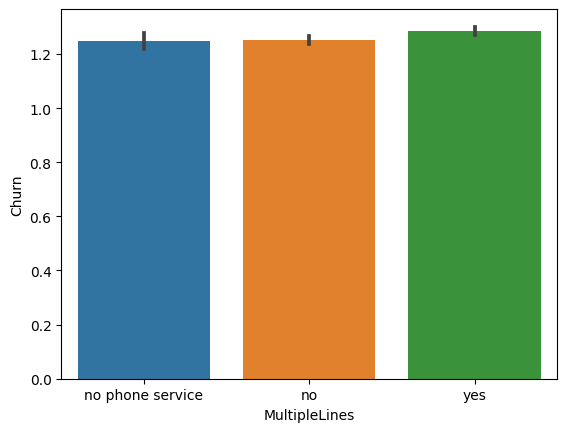

In [28]:
mapping = {0: 'no phone service', 1: 'no', 2: 'yes'}
data_eda['MultipleLines'] = data_eda['MultipleLines'].map(mapping)
sns.barplot(x=data_eda['MultipleLines'], y=data_eda['Churn'])

<Axes: xlabel='InternetService', ylabel='Churn'>

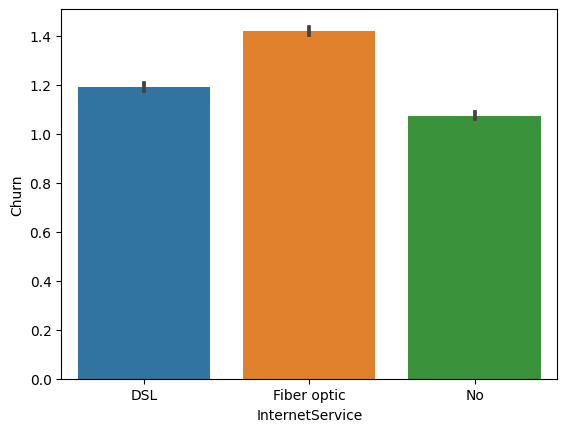

In [29]:
sns.barplot(x=data_eda['InternetService'], y=data_eda['Churn'])

<Axes: xlabel='OnlineSecurity', ylabel='Churn'>

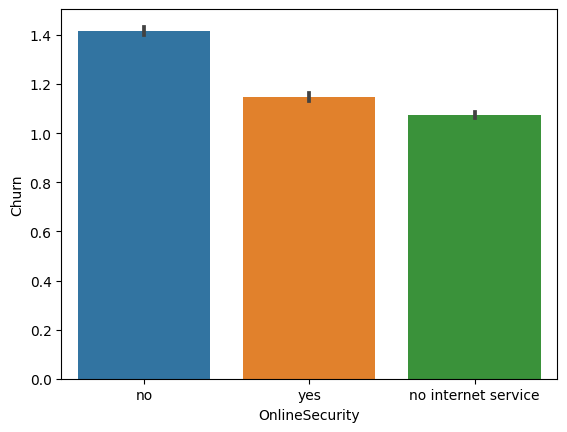

In [30]:
mapping = {0: 'no internet service', 1: 'no', 2: 'yes'}
data_eda['OnlineSecurity'] = data_eda['OnlineSecurity'].map(mapping)
sns.barplot(x=data_eda['OnlineSecurity'], y=data_eda['Churn'])

<Axes: xlabel='DeviceProtection', ylabel='Churn'>

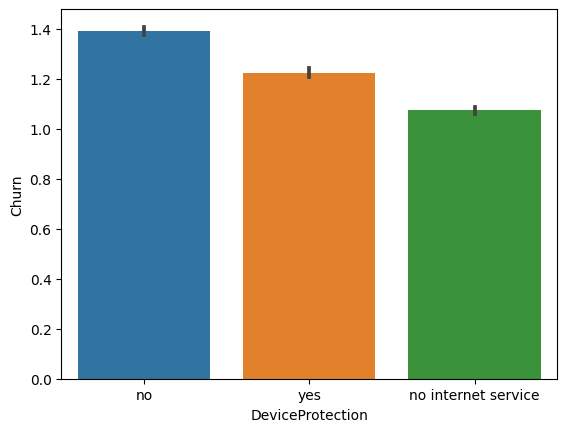

In [31]:
mapping = {0: 'no internet service', 1: 'no', 2: 'yes'}
data_eda['DeviceProtection'] = data_eda['DeviceProtection'].map(mapping)
sns.barplot(x=data_eda['DeviceProtection'], y=data_eda['Churn'])

<Axes: xlabel='TechSupport', ylabel='Churn'>

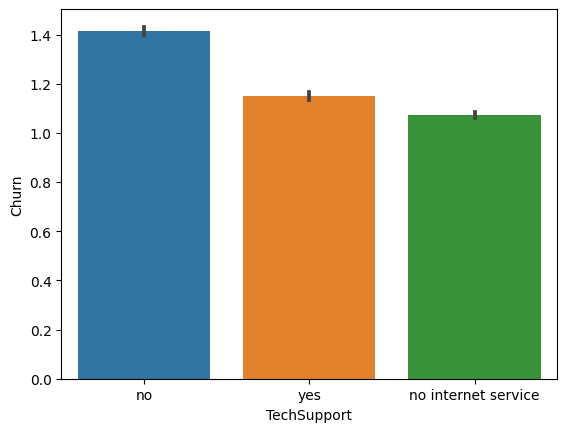

In [32]:
mapping = {0: 'no internet service', 1: 'no', 2: 'yes'}
data_eda['TechSupport'] = data_eda['TechSupport'].map(mapping)
sns.barplot(x=data_eda['TechSupport'], y=data_eda['Churn'])

Data Preprocessing

In [33]:
# Select columns with object data type
object_columns = data.select_dtypes(include=['object'])

yesNoCatCols = object_columns.columns.tolist()
yesNoCatCols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [34]:
data = data.drop('customerID', axis=1)

In [35]:
col_object = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',"PaymentMethod",'Churn']

for col in col_object:    
# Initialize the LabelEncoder
    label_encoder = LabelEncoder()
# Fit and transform the categorical column
    data[col] = label_encoder.fit_transform(data[col])

data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


In [36]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Convert 'TotalCharges' column to floats
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: float(x))

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


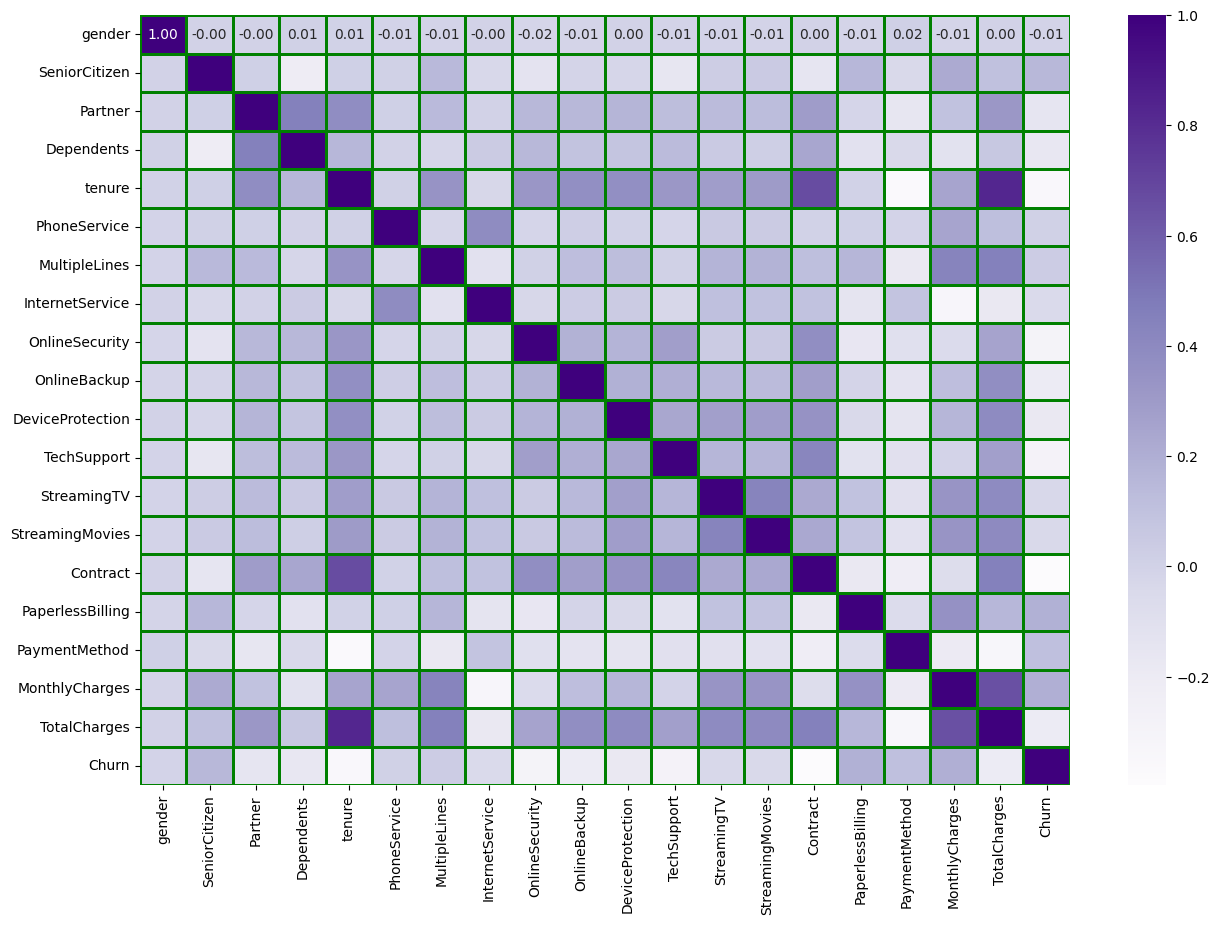

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [38]:
##to know the importance of features and extra features 
numerical_columns = data.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap='Purples', annot=True, fmt='.2f', linewidths=1, linecolor='Green')
plt.show()
data[numerical_columns].corr()['Churn']
print(data)


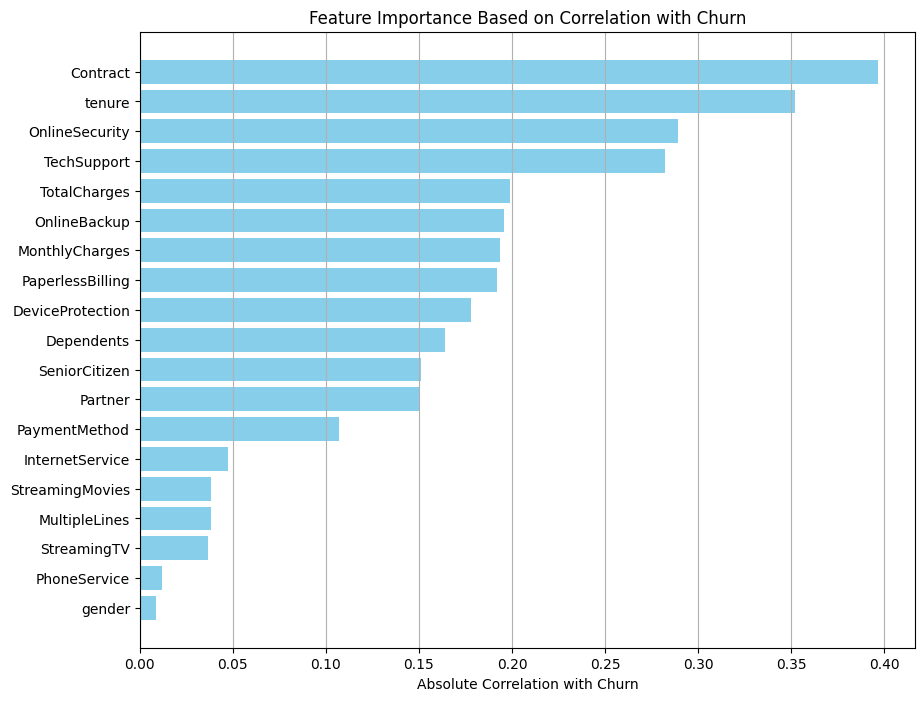

In [39]:
# Assuming the correlation values are stored in a dictionary or a pandas Series
correlations = {
    'gender': -0.008612,
    'SeniorCitizen': 0.150889,
    'Partner': -0.150448,
    'Dependents': -0.164221,
    'tenure': -0.352229,
    'PhoneService': 0.011942,
    'MultipleLines': 0.038037,
    'InternetService': -0.047291,
    'OnlineSecurity': -0.289309,
    'OnlineBackup': -0.195525,
    'DeviceProtection': -0.178134,
    'TechSupport': -0.282492,
    'StreamingTV': -0.036581,
    'StreamingMovies': -0.038492,
    'Contract': -0.396713,
    'PaperlessBilling': 0.191825,
    'PaymentMethod': 0.107062,
    'MonthlyCharges': 0.193356,
    'TotalCharges': -0.199037,
    'Churn': 1.0
}

# Convert the dictionary to a pandas Series for easy sorting and plotting
correlation_series = pd.Series(correlations)

# Sort the correlations by absolute value in descending order (excluding 'Churn')
correlation_series = correlation_series.drop('Churn').abs().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(correlation_series.index, correlation_series.values, color='skyblue')
plt.xlabel('Absolute Correlation with Churn')
plt.title('Feature Importance Based on Correlation with Churn')
plt.gca().invert_yaxis()  # Invert y axis to show the most correlated feature on top
plt.grid(axis='x')
plt.show()


In [40]:
import pandas as pd

# Given correlation values as a dictionary
correlations = {
    'gender': -0.008612,
    'SeniorCitizen': 0.150889,
    'Partner': -0.150448,
    'Dependents': -0.164221,
    'tenure': -0.352229,
    'PhoneService': 0.011942,
    'MultipleLines': 0.038037,
    'InternetService': -0.047291,
    'OnlineSecurity': -0.289309,
    'OnlineBackup': -0.195525,
    'DeviceProtection': -0.178134,
    'TechSupport': -0.282492,
    'StreamingTV': -0.036581,
    'StreamingMovies': -0.038492,
    'Contract': -0.396713,
    'PaperlessBilling': 0.191825,
    'PaymentMethod': 0.107062,
    'MonthlyCharges': 0.193356,
    'TotalCharges': -0.199037,
    'Churn': 1.0
}

# Convert the dictionary to a pandas Series for easy sorting and filtering
correlation_series = pd.Series(correlations)

# Drop the target variable correlation (Churn) and keep features with absolute correlation > 0.1
relevant_features = correlation_series.drop('Churn').abs()
removed_features = relevant_features[relevant_features < 0.1].index

# Print selected features based on correlation threshold
print("Selected Features based on Correlation Threshold (< 0.1):")
print(removed_features)


Selected Features based on Correlation Threshold (< 0.1):
Index(['gender', 'PhoneService', 'MultipleLines', 'InternetService',
       'StreamingTV', 'StreamingMovies'],
      dtype='object')


In [41]:
data.drop("gender",axis=1,inplace=True)
data.drop("PhoneService",axis=1,inplace=True)
data.drop("MultipleLines",axis=1,inplace=True)
data.drop("InternetService",axis=1,inplace=True)
data.drop("StreamingTV",axis=1,inplace=True)
data.drop("StreamingMovies",axis=1,inplace=True)


In [42]:
data

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,2,1,1,3,84.80,1990.50,0
7039,0,1,1,72,0,2,2,0,1,1,1,103.20,7362.90,0
7040,0,1,1,11,2,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,0,0,0,0,0,1,3,74.40,306.60,1


In [43]:
correlation = data.corr()["Churn"]  

# Sort features by absolute correlation with the target variable in descending order
sorted_features = correlation.abs().sort_values(ascending=False)

# Initialize cufflinks and offline mode for plotly
cf.go_offline()

# Plot the bar plot of sorted feature correlations
bar_plot = sorted_features.iplot(kind='bar', xTitle='Feature', yTitle='Correlation',
                                 title='Feature Importance (Correlation)',
                                 dimensions=(800, 500), asFigure=True)
bar_plot.update_layout(xaxis_tickangle=-90, showlegend=False)

py.iplot(bar_plot)


check continuos variable

In [44]:
continuous_vars = data.select_dtypes(include=['float64', 'int64']).columns

binary_vars = [col for col in continuous_vars if data[col].nunique() == 2]
print("Binary Variables:", binary_vars)

non_binary_continuous_vars = [col for col in continuous_vars if col not in binary_vars]
print("Non-Binary Continuous Variables:", non_binary_continuous_vars)


Binary Variables: ['SeniorCitizen']
Non-Binary Continuous Variables: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [45]:
def check_missing_values(df, columns):
    results = {}
    
    for column_name in columns:
        # Ensure the column exists
        if column_name not in df.columns:
            raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
        
        # Check for NaN values
        nan_count = df[column_name].isna().sum()
        
        # Check for empty string values
        empty_string_count = (df[column_name] == '').sum()
        
        # Check for null values (which are equivalent to NaN in pandas)
        # This is redundant as NaN values cover this case
        
        # Get rows with NaN or empty string
        missing_rows = df[df[column_name].isna() | (df[column_name] == '')]
        
        results[column_name] = {
            'NaN count': nan_count,
            'Empty string count': empty_string_count,
            'Rows with missing values': missing_rows
        }
    
    return results

columns_to_check = ['tenure', 'MonthlyCharges', 'TotalCharges']
result = check_missing_values(data, columns_to_check)

# Print results for each column
for column, info in result.items():
    print(f"Column: {column}")
    print(f"  NaN count: {info['NaN count']}")
    print(f"  Empty string count: {info['Empty string count']}")
    print(f"  Rows with missing values:\n{info['Rows with missing values']}")
    print("---")


Column: tenure
  NaN count: 0
  Empty string count: 0
  Rows with missing values:
Empty DataFrame
Columns: [SeniorCitizen, Partner, Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []
---
Column: MonthlyCharges
  NaN count: 0
  Empty string count: 0
  Rows with missing values:
Empty DataFrame
Columns: [SeniorCitizen, Partner, Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []
---
Column: TotalCharges
  NaN count: 11
  Empty string count: 0
  Rows with missing values:
      SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  \
488               0        1           1       0               2   
753               0        0           1       0               1   
936               0        1           1       0               2   
1082             

In [46]:
len(data)

7043

In [47]:
# drop null 
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [48]:
len(data)

7032

Check Outliner

In [49]:

def find_outliers_iqr(df, columns):
    outliers_summary = {}
    
    for column_name in columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
        outlier_count = len(outliers)
        
        outliers_summary[column_name] = (outliers, outlier_count)
    
    return outliers_summary


columns_to_check = ['tenure', 'MonthlyCharges', 'TotalCharges']
outliers_summary = find_outliers_iqr(data, columns_to_check)

for column, (outliers, count) in outliers_summary.items():
    print(f"Column: {column}")
    print(f"Number of outliers: {count}")
    print("---")


Column: tenure
Number of outliers: 0
---
Column: MonthlyCharges
Number of outliers: 0
---
Column: TotalCharges
Number of outliers: 0
---


Feature Engineering for continous variable

In [50]:
num_column_normalized = ['tenure', 'MonthlyCharges', 'TotalCharges']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('normalized', Normalizer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_column_normalized)
    ])

data_transformed = preprocessor.fit_transform(data)


In [51]:
data_transformed_df = pd.DataFrame(data_transformed, columns=num_column_normalized)

print("Shape of transformed_data_df:", data_transformed_df.shape)
data_transformed_df

Shape of transformed_data_df: (7032, 3)


,tenure,MonthlyCharges,TotalCharges
0,0.023682,0.706908,0.706908
1,0.017983,0.030122,0.999384
2,0.016552,0.445662,0.895048
3,0.024433,0.022967,0.999438
4,0.011952,0.422512,0.906279
...,...,...,...
7027,0.012045,0.042561,0.999021
7028,0.009777,0.014014,0.999854
7029,0.031620,0.085085,0.995872
7030,0.012677,0.235799,0.971719


In [52]:
data.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'], inplace=True)

In [53]:

final_data = pd.concat([data_transformed_df, data], axis=1)

final_data


,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Churn
0,0.023682,0.706908,0.706908,0,1,0,0,2,0,0,0,1,2,0
1,0.017983,0.030122,0.999384,0,0,0,2,0,2,0,1,0,3,0
2,0.016552,0.445662,0.895048,0,0,0,2,2,0,0,0,1,3,1
3,0.024433,0.022967,0.999438,0,0,0,2,0,2,2,1,0,0,0
4,0.011952,0.422512,0.906279,0,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.012045,0.042561,0.999021,0,1,1,2,0,2,2,1,1,3,0
7028,0.009777,0.014014,0.999854,0,1,1,0,2,2,0,1,1,1,0
7029,0.031620,0.085085,0.995872,0,1,1,2,0,0,0,0,1,2,0
7030,0.012677,0.235799,0.971719,1,1,0,0,0,0,0,0,1,3,1


Churn
0    5163
1    1869
Name: count, dtype: int64


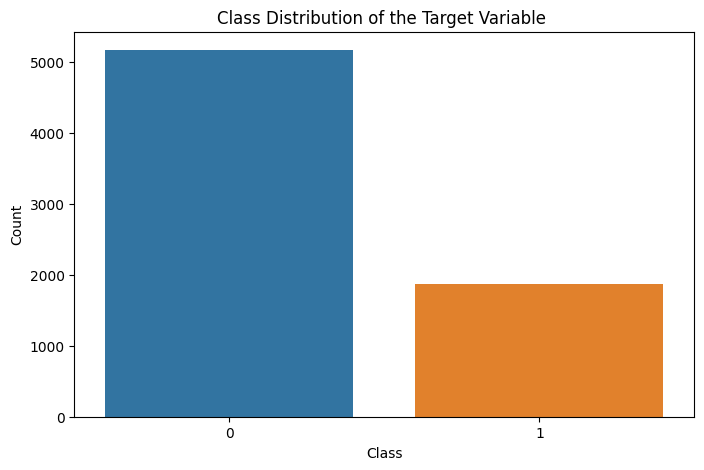

In [54]:
#Now lets check the data is imbalanced or not

target_column = 'Churn'
class_counts = final_data[target_column].value_counts()

print(class_counts)

# Plotting the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution of the Target Variable ')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [55]:
target = "Churn"

x = final_data.drop(target, axis=1)  # bien doc lap
y = final_data[target]              # bien phu thuoc

In [56]:
final_data.dtypes

tenure              float64
MonthlyCharges      float64
TotalCharges        float64
SeniorCitizen         int64
Partner               int32
Dependents            int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
Churn                 int32
dtype: object

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, stratify=y_train, random_state=10)

print("Training data shape x:", x_train.shape)
print("Training labels shape y:", y_train.shape)
print("Validation data shape x:", x_val.shape)
print("Validation labels shape y:", y_val.shape)
print("Test data shape x:", x_test.shape)
print("Test labels shape y:", y_test.shape)


Training data shape x: (4218, 13)
Training labels shape y: (4218,)
Validation data shape x: (1407, 13)
Validation labels shape y: (1407,)
Test data shape x: (1407, 13)
Test labels shape y: (1407,)


Churn
0    3097
1    1121
Name: count, dtype: int64
Churn
0    1033
1     374
Name: count, dtype: int64


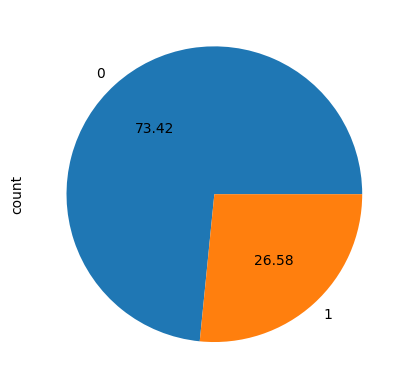

In [58]:
print(y_train.value_counts())
print(y_test.value_counts())

churn = y_train.value_counts().plot.pie(autopct = '%.2f')

In [59]:
print(x_train)

        tenure  MonthlyCharges  TotalCharges  SeniorCitizen  Partner  \
4321  0.021034        0.071655      0.997208              0        1   
3162  0.013444        0.015618      0.999788              0        1   
807   0.010166        0.707070      0.707070              0        0   
4823  0.025234        0.056357      0.998092              0        0   
436   0.049913        0.028908      0.998335              0        1   
...        ...             ...           ...            ...      ...   
3563  0.054539        0.064003      0.996458              0        0   
2849  0.014122        0.058439      0.998191              0        1   
6411  0.012211        0.030242      0.999468              0        1   
6265  0.011538        0.017590      0.999779              0        0   
5603  0.016086        0.022359      0.999621              0        0   

      Dependents  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
4321           0               0             0        

In [60]:
reg = Pipeline(steps=[
    ("model", SVC())
])

reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)

for i, j in zip(y_predict, y_test):
    print("Predicted Value: {} . Actual Value: {}".format(i,j))


Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 1 . Actual Value: 1
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 1
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 1 . Actual Value: 1
Predicted Value: 0 . Actual Value: 1
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 1 . Actual Value: 1
Predicted Value: 1 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 1 . Actual Value: 1
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
Predicted Value: 0 . Actual Value: 0
P

In [61]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1033
           1       0.67      0.40      0.50       374

    accuracy                           0.79      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407



Training Accuracy: 0.7923186344238976
Test Accuracy: 0.7889125799573561


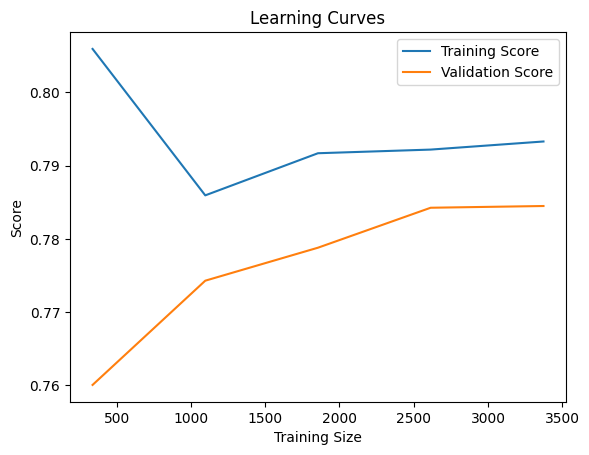

In [62]:
# Check overfitting
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

train_sizes, train_scores, test_scores = learning_curve(reg, x_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()


In [63]:
#LogisticRegression
reg = Pipeline(steps=[
    ("model", LogisticRegression())
])

reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1033
           1       0.69      0.43      0.53       374

    accuracy                           0.80      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



In [64]:
params = {
    "n_estimators" : [100,200,300],
    "criterion" : ["gini", "entropy"],
    "class_weight" : [None, "balanced"]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=params, cv=4 , verbose=2)

reg = Pipeline(steps=[
    ("model", grid_search)
])

reg.fit(x_train, y_train)
print(grid_search.best_estimator_)
print(grid_search.best_score_) 
print(grid_search.best_params_)

y_predict = reg.predict(x_test)
print(classification_report(y_test, y_predict))


Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.3s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   0.7s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   0.7s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   0.7s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   0.7s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   1.1s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   1.1s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   1.2s
[CV] END class_weight=None, criterion=gini, n_es

DNN

In [65]:
model = Sequential()

model.add(Input(shape=(13,)))

model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(units=64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=16, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 134,369 (524.88 KB)

 Trainable params: 132,545 (517.75 KB)

 Non-trainable params: 1,824 (7.12 KB)

In [67]:
optimizers = Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=100, batch_size=250, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4851 - loss: 0.8796 - val_accuracy: 0.7349 - val_loss: 0.5808
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4831 - loss: 0.8313 - val_accuracy: 0.6809 - val_loss: 0.6387
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5207 - loss: 0.7609 - val_accuracy: 0.6802 - val_loss: 0.6406
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5375 - loss: 0.7435 - val_accuracy: 0.6873 - val_loss: 0.6168
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5584 - loss: 0.7063 - val_accuracy: 0.6965 - val_loss: 0.5959
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5882 - loss: 0.6820 - val_accuracy: 0.7178 - val_loss: 0.5779
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6162 - loss: 0.6487 - val_accuracy: 0.7178 - val_loss: 0.5667
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6243 - loss: 0.6346 - val_accuracy: 0.7086 - 

In [69]:
y_predict = model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [70]:
y_output_test = []

for i in y_predict:
  if i > 0.5:
    y_output_test.append(1)
  else:
    y_output_test.append(0)

In [71]:
print('The Accuracy Score of Test Dataset is', accuracy_score(y_test, y_output_test))
print('\n')

print('The Classification Report of Test Dataset is ')
print(classification_report(y_test, y_output_test))
print('\n')


The Accuracy Score of Test Dataset is 0.7910447761194029


The Classification Report of Test Dataset is 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1033
           1       0.60      0.64      0.62       374

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.74      1407
weighted avg       0.80      0.79      0.79      1407





PCA

In [72]:
x_train

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod
4321,0.021034,0.071655,0.997208,0,1,0,0,0,0,0,0,1,2
3162,0.013444,0.015618,0.999788,0,1,0,2,2,2,2,2,1,3
807,0.010166,0.707070,0.707070,0,0,0,0,0,0,0,0,1,2
4823,0.025234,0.056357,0.998092,0,0,0,2,2,0,2,1,1,3
436,0.049913,0.028908,0.998335,0,1,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,0.054539,0.064003,0.996458,0,0,0,1,1,1,1,1,0,3
2849,0.014122,0.058439,0.998191,0,1,1,2,0,2,0,1,1,0
6411,0.012211,0.030242,0.999468,0,1,0,0,0,0,2,1,1,2
6265,0.011538,0.017590,0.999779,0,0,0,0,0,0,0,1,1,2


In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_components = min(14, x_train.shape[1])  # 14 or fewer
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(x_train)

print(f"Number of components used: {n_components}")

Number of components used: 13


In [74]:
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
X_pca = pca.fit_transform(x_train)

print(f"Number of components chosen to explain 95% variance: {pca.n_components_}")


Number of components chosen to explain 95% variance: 8


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

def evaluate_classification_models(x_train, y_train, x_test, y_test):
    accuracies = []
    f1_scores = []
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
    }

    for model_name, model in models.items():
        print(f"****** {model_name} ******")
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracies.append(accuracy)
        f1_scores.append(f1)
        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print("\n")

    # Option 1: Create multiple subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # Plot data to each axis
    ax1.bar(['Logistic Regression', 'SVC', 'Random Forest'], accuracies)
    ax1.set(title="Model Names", ylabel="Accuracy Scores")
    ax2.bar(['Logistic Regression', 'SVC', 'Random Forest'], f1_scores)
    ax2.set(title="Model Names", ylabel="F1 Scores")

    plt.show()



In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt



# Apply PCA to reduce dimensionality to the number of components explaining 95% variance
pca = PCA(n_components=8)  # Using 8 components
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)



****** Logistic Regression ******
Accuracy: 0.7796730632551528
F1 Score: 0.7668603812440574


****** SVC ******
Accuracy: 0.7775408670931059
F1 Score: 0.7573550043279051


****** Random Forest ******
Accuracy: 0.7569296375266524
F1 Score: 0.7450663653827237




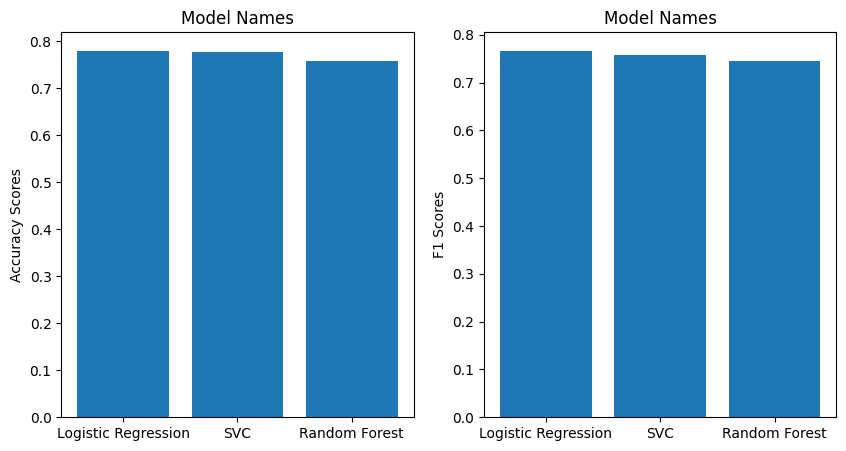

In [77]:
evaluate_classification_models(x_train_pca, y_train, x_test_pca, y_test)

Handle Imbalance Data

Naive UnderSampling

Churn
0    1121
1    1121
Name: count, dtype: int64


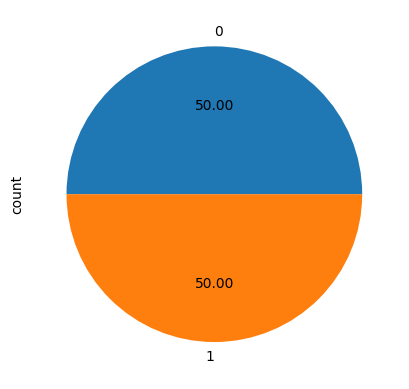

In [78]:
# Apply undersampling with RandomForestClassifer
undersample = RandomUnderSampler(random_state=42)
x_train_res, y_train_res = undersample.fit_resample(x_train, y_train)

resample_plot = y_train_res.value_counts().plot.pie(autopct ='%.2f')
print(y_train_res.value_counts())

In [79]:
params = {
    "n_estimators" : [100,200,300],
    "criterion" : ["gini", "entropy"],
    "class_weight" : [None, "balanced"]
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=params, cv=4 , verbose=2)

reg = Pipeline(steps=[
    ("model", grid_search)
])

reg.fit(x_train_res, y_train_res)
print(grid_search.best_estimator_)
print(grid_search.best_score_) 
print(grid_search.best_params_)

y_predict = reg.predict(x_test)
print(classification_report(y_test, y_predict))



Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.2s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   0.4s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   0.7s
[CV] END class_weight=None, criterion=gini, n_es

In [80]:
# Apply undersampling with LogisticRegression

reg = Pipeline(steps=[
    ("model", LogisticRegression())
])

reg.fit(x_train_res, y_train_res)

y_predict = reg.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1033
           1       0.49      0.83      0.62       374

    accuracy                           0.72      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.72      0.74      1407



In [81]:
# Apply undersampling with SVC

reg = Pipeline(steps=[
    ("model", SVC())
])

reg.fit(x_train_res, y_train_res)


y_predict = reg.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1033
           1       0.49      0.83      0.62       374

    accuracy                           0.72      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.72      0.74      1407



Naive OverSampling

Churn
0    3097
1    3097
Name: count, dtype: int64


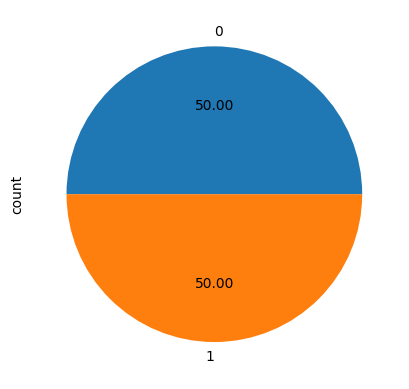

In [82]:
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_train, y_train)

resample_plot = y_train_res.value_counts().plot.pie(autopct ='%.2f')
print(y_train_res.value_counts())

In [83]:
params = {
    "n_estimators" : [100,200,300],
    "criterion" : ["gini", "entropy"],
    "class_weight" : [None, "balanced"]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=params, cv=4 , verbose=2)

reg = Pipeline(steps=[
    ("model", grid_search)
])

reg.fit(x_train_res, y_train_res)
print(grid_search.best_estimator_)
print(grid_search.best_score_) 
print(grid_search.best_params_)

y_predict = reg.predict(x_test)
print(classification_report(y_test, y_predict))


Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.4s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.4s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.4s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.4s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   1.6s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   1.6s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   1.7s
[CV] END class_weight=None, criterion=gini, n_es

In [84]:
reg = Pipeline(steps=[
    ("model", LogisticRegression())
])

reg.fit(x_train_res, y_train_res)

y_predict = reg.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1033
           1       0.49      0.83      0.62       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.73      0.74      1407



In [85]:
reg = Pipeline(steps=[
    ("model", SVC())
])

reg.fit(x_train_res, y_train_res)

y_predict = reg.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1033
           1       0.49      0.82      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.73      0.74      1407



SMOTE 

In [86]:
# Apply SMOTE for balancing the classes
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

params = {
    "n_estimators" : [100,200,300],
    "criterion" : ["gini", "entropy"],
    "class_weight" : [None, "balanced"]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=params, cv=4 , verbose=2)

reg = Pipeline(steps=[
    ("model", grid_search)
])

reg.fit(x_train_res, y_train_res)
print(grid_search.best_estimator_)
print(grid_search.best_score_)  
print(grid_search.best_params_)

y_predict = reg.predict(x_test)
print(classification_report(y_test, y_predict))



Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, criterion=gini, n_estimators=100; total time=   0.5s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   1.0s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   1.2s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   1.1s
[CV] END class_weight=None, criterion=gini, n_estimators=200; total time=   1.1s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   1.6s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   1.8s
[CV] END class_weight=None, criterion=gini, n_estimators=300; total time=   1.8s
[CV] END class_weight=None, criterion=gini, n_es

In [87]:
# Apply SMOTE for balancing the classes
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = LogisticRegression()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.49      0.82      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407



In [88]:
# Apply SMOTE for balancing the classes
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = SVC()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.49      0.82      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407



ADASYN

In [89]:
# Apply ADASYN for balancing the classes
adasyn = ADASYN(random_state=42)
x_train_res, y_train_res = adasyn.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = RandomForestClassifier(n_estimators=300, criterion="entropy", random_state=100, verbose=2)
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.5s


building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


In [90]:
# Apply ADASYN for balancing the classes
adasyn = ADASYN(random_state=42)
x_train_res, y_train_res = adasyn.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = LogisticRegression()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

# Print the shape of the resampled training data
print(x_train_res.shape, y_train_res.shape)


              precision    recall  f1-score   support

           0       0.93      0.65      0.76      1033
           1       0.47      0.86      0.61       374

    accuracy                           0.71      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.81      0.71      0.72      1407

(6227, 13) (6227,)


In [91]:
# Apply ADASYN for balancing the classes
adasyn = ADASYN(random_state=42)
x_train_res, y_train_res = adasyn.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = SVC()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1033
           1       0.48      0.86      0.61       374

    accuracy                           0.71      1407
   macro avg       0.70      0.76      0.69      1407
weighted avg       0.81      0.71      0.73      1407



BorderlineSMOTE

In [92]:

bls = BorderlineSMOTE(random_state=42)
x_train_res, y_train_res = bls.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = RandomForestClassifier(n_estimators=300, criterion="entropy", random_state=100, verbose=2)
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

# Print the shape of the resampled training data
print(x_train_res.shape, y_train_res.shape)


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.4s


building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


In [93]:
bls = BorderlineSMOTE(random_state=42)

x_train_res, y_train_res = bls.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = LogisticRegression()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.63      0.75      1033
           1       0.46      0.87      0.60       374

    accuracy                           0.70      1407
   macro avg       0.69      0.75      0.68      1407
weighted avg       0.80      0.70      0.71      1407



In [94]:
bls = BorderlineSMOTE(random_state=42)

x_train_res, y_train_res = bls.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = SVC()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1033
           1       0.48      0.87      0.62       374

    accuracy                           0.71      1407
   macro avg       0.71      0.76      0.69      1407
weighted avg       0.81      0.71      0.73      1407



SVMSMOTE

In [95]:
svm_smote = SVMSMOTE(random_state=42)
x_train_res, y_train_res = svm_smote.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = RandomForestClassifier(n_estimators=300, criterion="entropy", random_state=100, verbose=2)
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))



building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.4s


building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


In [96]:
svm_smote = SVMSMOTE(random_state=42)
x_train_res, y_train_res = svm_smote.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = LogisticRegression()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1033
           1       0.49      0.83      0.62       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.73      0.74      1407



In [97]:
svm_smote = SVMSMOTE(random_state=42)
x_train_res, y_train_res = svm_smote.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = SVC()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.81      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



KMeansSMOTE

In [98]:
kmean_smote = KMeansSMOTE(random_state=42)
x_train_res, y_train_res = kmean_smote.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = RandomForestClassifier(n_estimators=300, criterion="entropy", random_state=100, verbose=2)
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.3s


building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


In [99]:
kmean_smote = KMeansSMOTE(random_state=42)
x_train_res, y_train_res = kmean_smote.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = LogisticRegression()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.53      0.64      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.77      0.76      0.76      1407



In [100]:
kmean_smote = KMeansSMOTE(random_state=42)
x_train_res, y_train_res = kmean_smote.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = SVC()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1033
           1       0.60      0.57      0.58       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407



SMOTETomek

In [101]:
smt = SMOTETomek(random_state=42)
x_train_res, y_train_res = smt.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = RandomForestClassifier(n_estimators=300, criterion="entropy", random_state=100, verbose=2)
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s


building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.2s


building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


In [102]:
smt = SMOTETomek(random_state=42)
x_train_res, y_train_res = smt.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = LogisticRegression()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1033
           1       0.48      0.83      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407



In [103]:
smt = SMOTETomek(random_state=42)
x_train_res, y_train_res = smt.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = SVC()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.49      0.82      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407



SMOTEENN

In [104]:
sme = SMOTEENN(random_state=42)
x_train_res, y_train_res = sme.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = RandomForestClassifier(n_estimators=300, criterion="entropy", random_state=100, verbose=2)
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))

building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.5s


building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


In [105]:
sme = SMOTEENN(random_state=42)
x_train_res, y_train_res = smt.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = LogisticRegression()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1033
           1       0.48      0.83      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407



In [106]:
sme = SMOTEENN(random_state=42)
x_train_res, y_train_res = sme.fit_resample(x_train, y_train)

# Define and train the RandomForest model
model = SVC()
model.fit(x_train_res, y_train_res)

# Make predictions and evaluate the model
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1033
           1       0.49      0.83      0.62       374

    accuracy                           0.73      1407
   macro avg       0.71      0.76      0.70      1407
weighted avg       0.81      0.73      0.74      1407



In Conclusion: BorderlineSMOTE with SVC has the best recall for class 1: 0.87 but low at precision 0.48, eventhough our reseach concern about recall but < 0.5 is unacceptable

0.48      0.87      0.62


CSWRF + borderline

GirdSearch for best n_estimators, max_depth with recall

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    "criterion" : ["gini", "entropy"],
    "class_weight" : [None, "balanced"]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(x_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from imblearn.over_sampling import BorderlineSMOTE

class CSWRF:
    def __init__(self, n_estimators, k, max_depth):
        self.n_estimators = n_estimators
        self.k = k
        self.max_depth = max_depth
        self.models = []
        self.weights = []
        self.scores = []
        self.f1_scores = []

    def fit(self, X, y):
        kf = StratifiedKFold(n_splits=self.k)
        self.scores = []
        self.f1_scores = []

        for train_index, val_index in kf.split(X, y):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Apply BorderlineSMOTE
            smote = BorderlineSMOTE(random_state=42)
            X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

            # Initialize and train the RandomForestClassifier
            model = RandomForestClassifier(
                n_estimators=self.n_estimators,
                max_depth=self.max_depth,
                class_weight='balanced',
                random_state=42
            )
            model.fit(X_train_res, y_train_res)
            y_pred = model.predict(X_val)

            accuracy = accuracy_score(y_val, y_pred)
            f1 = f1_score(y_val, y_pred)

            self.scores.append(accuracy)
            self.f1_scores.append(f1)

            self.models.append(model)

        # Calculate weights based on F1 scores
        total_f1 = sum(self.f1_scores)
        self.weights = [f1 / total_f1 for f1 in self.f1_scores]

        # Calculate and print average metrics
        avg_accuracy = np.mean(self.scores)
        avg_f1 = np.mean(self.f1_scores)
        print(f"Average Accuracy: {avg_accuracy:.4f}")
        print(f"Average F1 Score: {avg_f1:.4f}")

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            predictions[:, i] = model.predict(X)

        final_prediction = np.average(predictions, axis=1, weights=self.weights)
        final_prediction = np.round(final_prediction).astype(int)
        return final_prediction

    def predict_proba(self, X):
        probas = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            probas[:, i] = model.predict_proba(X)[:, 1]

        final_proba = np.average(probas, axis=1, weights=self.weights)
        return final_proba

# Example usage
cswrf = CSWRF(n_estimators=400, k=10, max_depth=10)
cswrf.fit(x_train, y_train)
y_pred = cswrf.predict(x_test)
y_proba = cswrf.predict_proba(x_test)

# Calculate ROC AUC Score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba)}")

# Print classification report
print(classification_report(y_test, y_pred))


Average Accuracy: 0.7432
Average F1 Score: 0.6156
ROC AUC Score: 0.8399060935647689
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.78      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



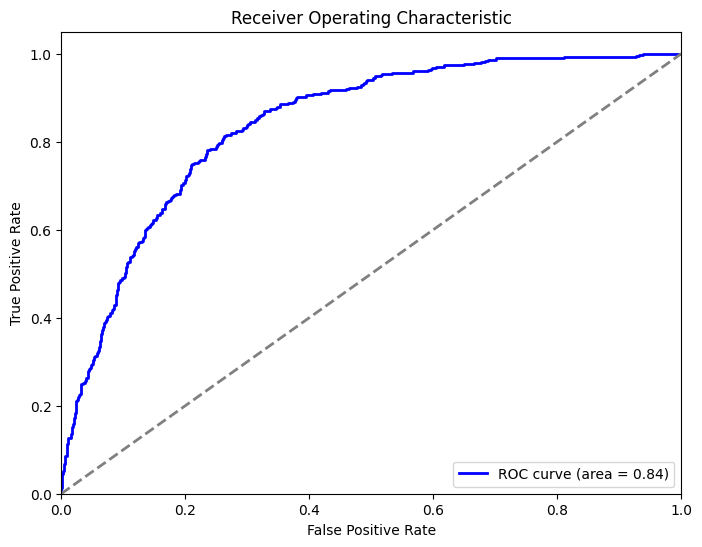

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


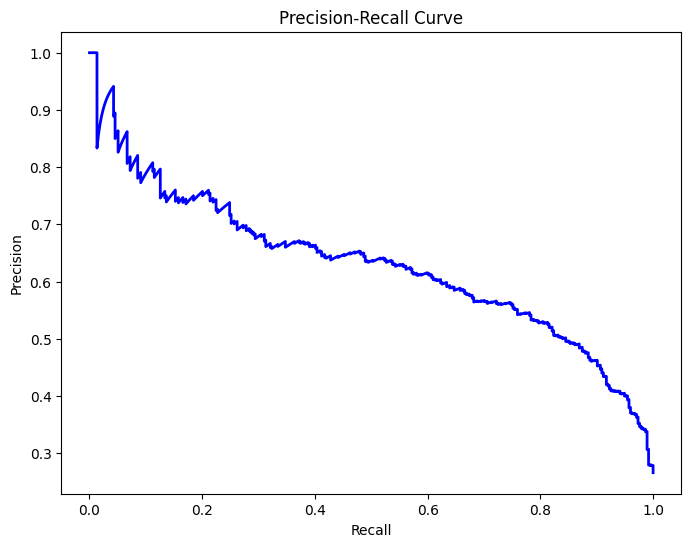

In [115]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


BorderLineSMOTE + Tomek Link

In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline as imPipeline


# Apply BorderlineSMOTE for over-sampling the minority class
bls = BorderlineSMOTE(random_state=42)
X_train_res, y_train_res = bls.fit_resample(x_train, y_train)

# Apply Tomek Links for under-sampling to clean boundary
tomek = TomekLinks()
X_train_clean, y_train_clean = tomek.fit_resample(X_train_res, y_train_res)

# Define Random Forest Classifier
rf = RandomForestClassifier(n_estimators=400, max_depth=10, class_weight='balanced', random_state=42)

# Create a pipeline
pipeline = imPipeline([
    ('rf', rf)
])

# Train the model
pipeline.fit(X_train_clean, y_train_clean)

# Make predictions
y_pred = pipeline.predict(x_test)
y_proba = pipeline.predict_proba(x_test)[:, 1]  # Probability for positive class

# Calculate and print metrics
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba)}")
print(classification_report(y_test, y_pred))


ROC AUC Score: 0.8351926531415171
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1033
           1       0.54      0.77      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [117]:
# Apply BorderlineSMOTE for over-sampling the minority class
bls = BorderlineSMOTE(random_state=42)
X_train_res, y_train_res = bls.fit_resample(x_train, y_train)

# Apply Tomek Links for under-sampling to clean boundary
tomek = TomekLinks()
X_train_clean, y_train_clean = tomek.fit_resample(X_train_res, y_train_res)


# Create a pipeline
pipeline = imPipeline([
    ('model', LogisticRegression())
])

# Train the model
pipeline.fit(X_train_clean, y_train_clean)

# Make predictions
y_pred = pipeline.predict(x_test)

# Calculate and print metrics
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba)}")
print(classification_report(y_test, y_pred))


ROC AUC Score: 0.8351926531415171
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1033
           1       0.47      0.84      0.60       374

    accuracy                           0.71      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.71      0.72      1407



In [118]:
# Apply BorderlineSMOTE for over-sampling the minority class
bls = BorderlineSMOTE(random_state=42)
X_train_res, y_train_res = bls.fit_resample(x_train, y_train)

# Apply Tomek Links for under-sampling to clean boundary
tomek = TomekLinks()
X_train_clean, y_train_clean = tomek.fit_resample(X_train_res, y_train_res)


# Create a pipeline
pipeline = imPipeline([
    ('model', SVC())
])

# Train the model
pipeline.fit(X_train_clean, y_train_clean)

# Make predictions
y_pred = pipeline.predict(x_test)


# Calculate and print metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1033
           1       0.48      0.84      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.76      0.69      1407
weighted avg       0.80      0.72      0.73      1407

